In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

2024-04-27 21:11:54.872516: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-27 21:11:54.872570: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-27 21:11:54.874028: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
Train = "/kaggle/input/medicinal-plant-bijly-withbg/Medicinal Plant-Bijly-withBG/Train"
Validation = "/kaggle/input/medicinal-plant-bijly-withbg/Medicinal Plant-Bijly-withBG/Validation"
Test = "/kaggle/input/medicinal-plant-bijly-withbg/Medicinal Plant-Bijly-withBG/Test"

In [3]:
# Load the training dataset using TensorFlow's image_dataset_from_directory function
training_set = tf.keras.utils.image_dataset_from_directory(
    Train,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 3500 files belonging to 10 classes.


In [4]:
# Load the training dataset using TensorFlow's image_dataset_from_directory function
Validation_set = tf.keras.utils.image_dataset_from_directory(
    Validation,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 500 files belonging to 10 classes.


In [5]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [6]:
cnn = tf.keras.models.Sequential()

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(128, 128, 3)))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [13]:
cnn.add(tf.keras.layers.Flatten())

In [14]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [15]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [16]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [17]:
# cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
#     learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [18]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        15,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,800,734 (29.76 MB)

 Trainable params: 7,800,734 (29.76 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
training_history = cnn.fit(x=training_set,validation_data=Validation_set,epochs=10)

Epoch 1/10
  2/110 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.0859 - loss: 3.5489  

I0000 00:00:1714252353.766618     300 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1714252353.787303     300 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2676 - loss: 2.1218

W0000 00:00:1714252476.380721     302 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714252487.427218     299 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


110/110 ━━━━━━━━━━━━━━━━━━━━ 176s 1s/step - accuracy: 0.2689 - loss: 2.1176 - val_accuracy: 0.5480 - val_loss: 1.3067
Epoch 2/10


W0000 00:00:1714252497.610810     300 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


110/110 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.6981 - loss: 0.8462 - val_accuracy: 0.6920 - val_loss: 0.8652
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.8250 - loss: 0.5043 - val_accuracy: 0.7360 - val_loss: 0.8202
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.8619 - loss: 0.3999 - val_accuracy: 0.7360 - val_loss: 0.8950
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.9028 - loss: 0.2844 - val_accuracy: 0.7120 - val_loss: 0.9412
Epoch 6/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.9473 - loss: 0.1738 - val_accuracy: 0.7760 - val_loss: 0.9306
Epoch 7/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.9516 - loss: 0.1420 - val_accuracy: 0.8060 - val_loss: 0.7022
Epoch 8/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.9581 - loss: 0.1323 - val_accuracy: 0.7520 - val_loss: 1.5116
Epoch 9/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.9612 - loss: 0.1184 - val_accuracy: 0.808

In [56]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

110/110 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.9581 - loss: 0.1435
Training accuracy: 0.9602857232093811


In [57]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(Validation_set)
print('Validation accuracy:', val_acc)

16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 484ms/step - accuracy: 0.7531 - loss: 0.8495
Validation accuracy: 0.7480000257492065


In [58]:
cnn.save('trained_medical_plant_model.keras')

In [59]:
cnn.save('trained_medical_plant_model.h5')

In [60]:
 #Return Dictionary of history
training_history.history

{'accuracy': [0.412285715341568,
  0.7357142567634583,
  0.836571455001831,
  0.87628573179245,
  0.9160000085830688,
  0.9522857069969177,
  0.9502857327461243,
  0.9645714163780212,
  0.9662857055664062,
  0.9668571352958679],
 'loss': [1.6490190029144287,
  0.7250239253044128,
  0.45797353982925415,
  0.34509214758872986,
  0.24791350960731506,
  0.1462855190038681,
  0.145699605345726,
  0.10577322542667389,
  0.10101764649152756,
  0.11108657717704773],
 'val_accuracy': [0.5479999780654907,
  0.6919999718666077,
  0.7360000014305115,
  0.7360000014305115,
  0.7120000123977661,
  0.7760000228881836,
  0.8059999942779541,
  0.7519999742507935,
  0.8080000281333923,
  0.7480000257492065],
 'val_loss': [1.306692361831665,
  0.8652111887931824,
  0.820182740688324,
  0.8949567079544067,
  0.9412202835083008,
  0.9306164979934692,
  0.7022256851196289,
  1.5116487741470337,
  0.7009559869766235,
  0.8378905653953552]}

In [61]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
    json.dump(training_history.history,f)

In [62]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


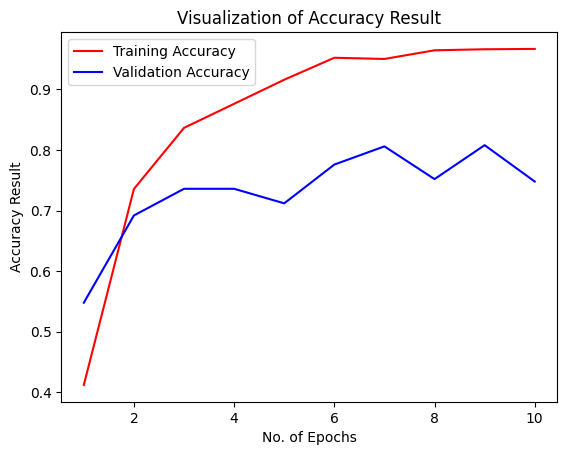

In [63]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Result')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [64]:
class_name = Validation_set.class_names
class_name

['Bohera',
 'Devilbackbone',
 'Haritoki',
 'Lemongrass',
 'Nayontara',
 'Neem',
 'Pathorkuchi',
 'Thankuni',
 'Tulsi',
 'Zenora']

In [65]:
# Load the training dataset using TensorFlow's image_dataset_from_directory function
test_set = tf.keras.utils.image_dataset_from_directory(
    Test,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1000 files belonging to 10 classes.


In [66]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step


In [67]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [68]:
Y_true

<tf.Tensor: shape=(1000,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
    

In [69]:
predicted_categories

<tf.Tensor: shape=(1000,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 4, 7, 2, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 7, 1, 2, 1, 1, 1, 7, 1, 4, 1, 0, 7, 1, 2, 2, 2, 4, 4,
       4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 4, 8, 1, 1, 1, 4, 8, 1, 4, 1, 4, 6,
       4, 8, 4, 8, 4, 8, 2, 1, 1, 2, 4, 1, 1, 1, 4, 4, 4, 1, 2, 2, 4, 4,
       4, 4, 1, 4, 1, 6, 4, 8, 4, 4, 4, 4, 4, 1, 4, 2, 4, 4, 4, 4, 1, 4,
       4, 8, 8, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 8, 2, 2, 2, 2, 8, 8, 4,
       8, 8, 4, 8, 8, 4, 4, 4, 4, 4, 4, 8, 8, 8, 8, 8, 8, 8, 8, 4, 4, 4,
       4, 4, 4, 8, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 8, 5, 5, 5, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 8, 8, 8, 8, 8, 2, 8,
    

In [70]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [71]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

               precision    recall  f1-score   support

       Bohera       0.90      0.93      0.92       100
Devilbackbone       0.61      0.30      0.40       100
     Haritoki       0.29      0.16      0.21       100
   Lemongrass       1.00      0.97      0.98       100
    Nayontara       0.34      0.76      0.47       100
         Neem       0.91      0.81      0.86       100
  Pathorkuchi       0.98      0.99      0.99       100
     Thankuni       0.70      0.57      0.63       100
        Tulsi       0.47      0.57      0.52       100
       Zenora       0.96      0.76      0.85       100

     accuracy                           0.68      1000
    macro avg       0.72      0.68      0.68      1000
 weighted avg       0.72      0.68      0.68      1000



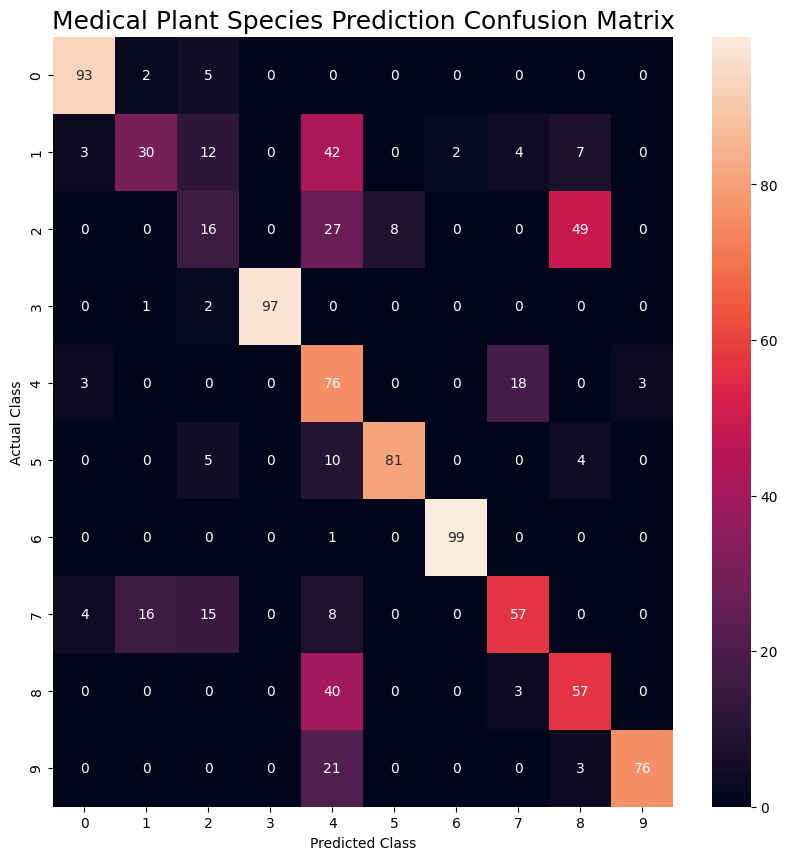

In [72]:
plt.figure(figsize=(10, 10))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 10)
plt.ylabel('Actual Class',fontsize = 10)
plt.title('Medical Plant Species Prediction Confusion Matrix',fontsize = 18)
plt.show()

In [74]:
cnn.save('last_medical_plant_model.h5')